In [60]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
from mpl_toolkits.basemap import Basemap

In [61]:
# Load the dataset
file_path = 'C:/Users/jantp/Desktop/BorderCrossingAnalysis/Border_Crossing_Entry_Data.csv'
data = pd.read_csv(file_path)


In [62]:
# Basic Data Exploration
print("First few rows of the dataset:", data.head())
print("\nDataset size:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary of Numerical Columns:\n", data.describe())

First few rows of the dataset:   Port Name         State  Port Code            Border      Date  \
0   Detroit      Michigan       3801  US-Canada Border  Aug 2023   
1     Alcan        Alaska       3104  US-Canada Border  Jul 2023   
2    Calais         Maine        115  US-Canada Border  Jul 2023   
3    Noonan  North Dakota       3420  US-Canada Border  Jul 2023   
4   Warroad     Minnesota       3423  US-Canada Border  May 2023   

          Measure  Value  Latitude  Longitude                          Point  
0          Trains    128    42.332    -83.048   POINT (-83.047924 42.331685)  
1  Bus Passengers    696    62.615   -141.001  POINT (-141.001444 62.614961)  
2           Buses     16    45.189    -67.275   POINT (-67.275381 45.188548)  
3          Trucks    142    48.999   -103.004  POINT (-103.004361 48.999333)  
4           Buses     41    48.999    -95.377      POINT (-95.376555 48.999)  

Dataset size: (386549, 10)

Data Types:
 Port Name     object
State         object
Po

In [63]:
# Convert 'Date' to datetime for further analysis
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

In [64]:

# Analysis and Visualization

C:\Users\jantp\AppData\Local\Temp\ipykernel_13680\3430279474.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



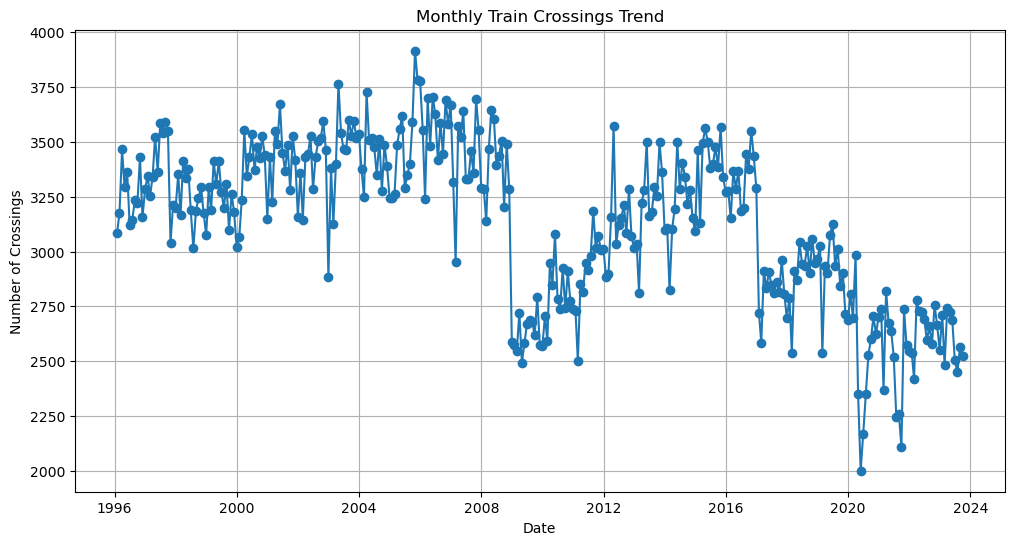

In [66]:
## Time Series Analysis for 'Trains'
trains_data = data[data['Measure'] == 'Trains']
monthly_trains = trains_data.groupby(pd.Grouper(key='Date', freq='M')).sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_trains['Value'], marker='o')
plt.title('Monthly Train Crossings Trend')
plt.xlabel('Date')
plt.ylabel('Number of Crossings')
plt.grid(True)
plt.show()

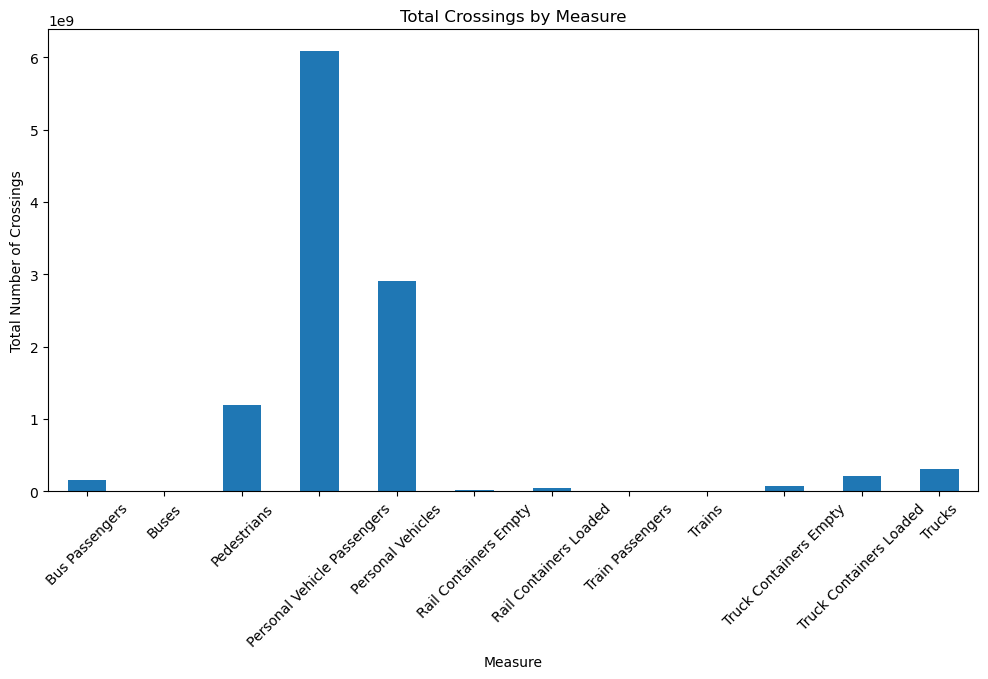

In [67]:
## Total Crossings by Measure
measure_totals = data.groupby('Measure')['Value'].sum()
plt.figure(figsize=(12, 6))
measure_totals.plot(kind='bar')
plt.title('Total Crossings by Measure')
plt.xlabel('Measure')
plt.ylabel('Total Number of Crossings')
plt.xticks(rotation=45)
plt.show()

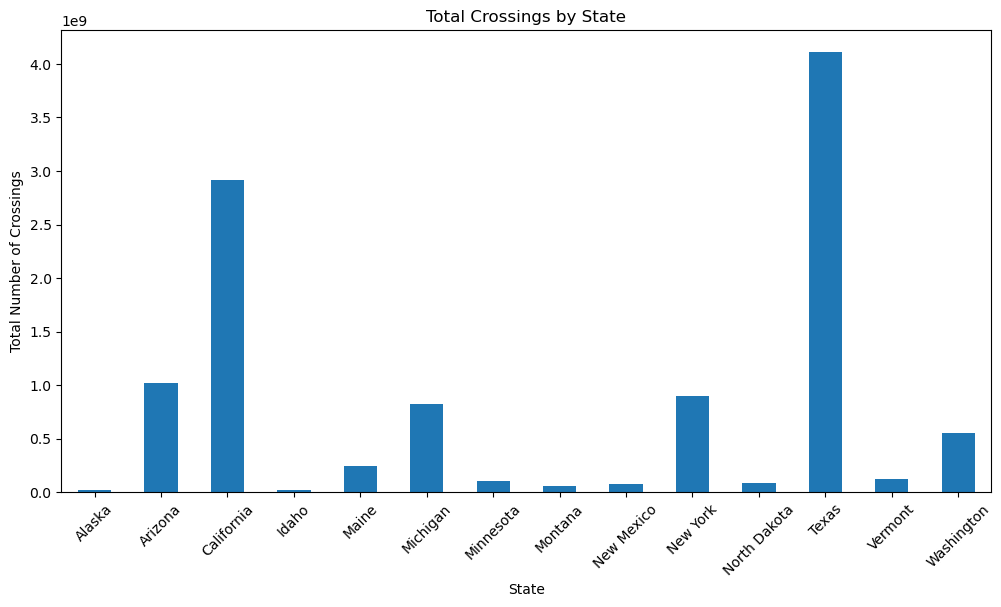

In [68]:
## Total Crossings by State
state_totals = data.groupby('State')['Value'].sum()
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total Crossings by State')
plt.xlabel('State')
plt.ylabel('Total Number of Crossings')
plt.xticks(rotation=45)
plt.show()

C:\Users\jantp\AppData\Local\Temp\ipykernel_13680\3061460936.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



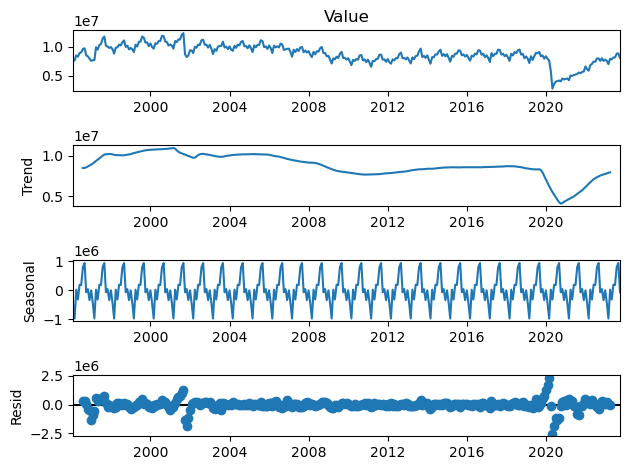

In [69]:
## Seasonal Decomposition of 'Personal Vehicles'
pv_data = data[data['Measure'] == 'Personal Vehicles']
monthly_pv = pv_data.groupby(pd.Grouper(key='Date', freq='M')).sum()
decomposition = seasonal_decompose(monthly_pv['Value'], model='additive')
decomposition.plot()
plt.show()

C:\Users\jantp\AppData\Local\Temp\ipykernel_13680\944410395.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_pv = pv_data.groupby(pd.Grouper(key='Date', freq='M')).sum()


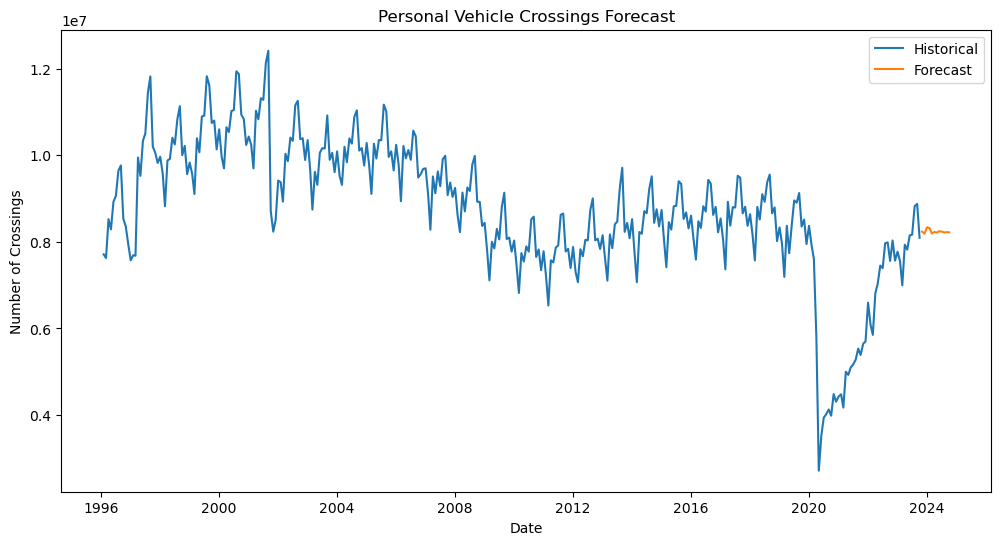

In [50]:
## Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

C:\Users\jantp\AppData\Local\Temp\ipykernel_13680\1834584065.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



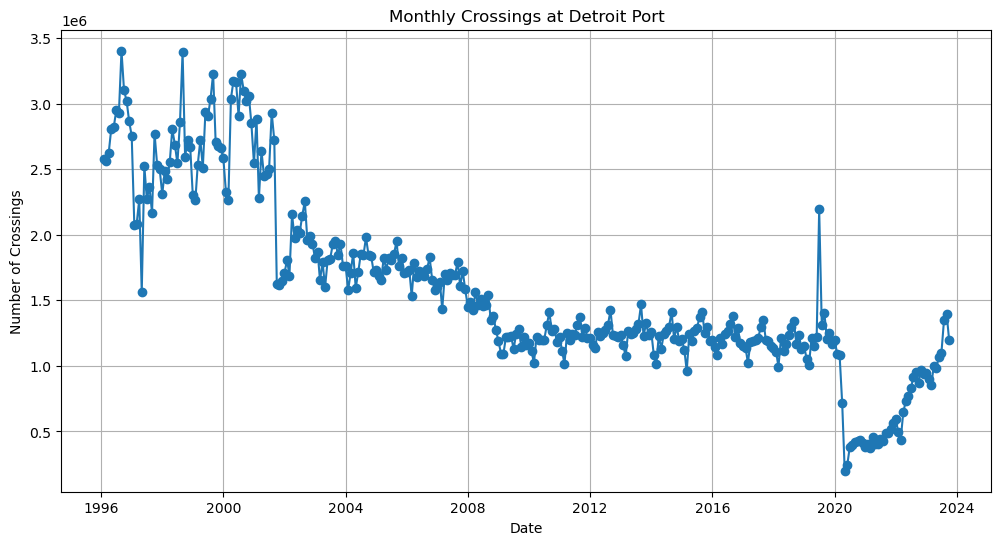

In [70]:
## Monthly Crossings at Detroit Port
detroit_data = data[data['Port Name'] == 'Detroit']
monthly_detroit = detroit_data.groupby(pd.Grouper(key='Date', freq='M')).sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_detroit['Value'], marker='o')
plt.title('Monthly Crossings at Detroit Port')
plt.xlabel('Date')
plt.ylabel('Number of Crossings')
plt.grid(True)
plt.show()


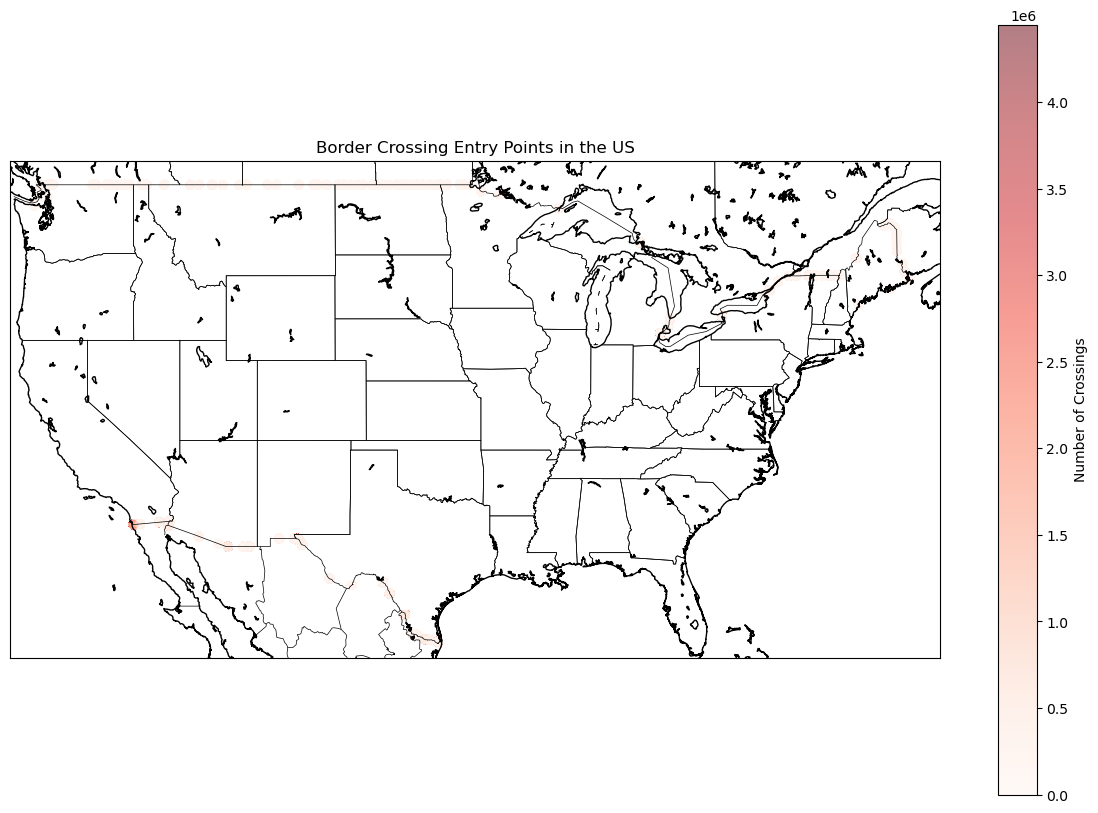

In [71]:
## Geospatial Visualization of Border Crossings
plt.figure(figsize=(15,10))
m = Basemap(projection='merc', llcrnrlat=25, urcrnrlat=50,
            llcrnrlon=-125, urcrnrlon=-65, lat_ts=20, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.scatter(data['Longitude'].tolist(), data['Latitude'].tolist(), latlon=True,
          c=data['Value'], cmap='Reds', alpha=0.5)
plt.colorbar(label='Number of Crossings')
plt.title('Border Crossing Entry Points in the US')
plt.show()


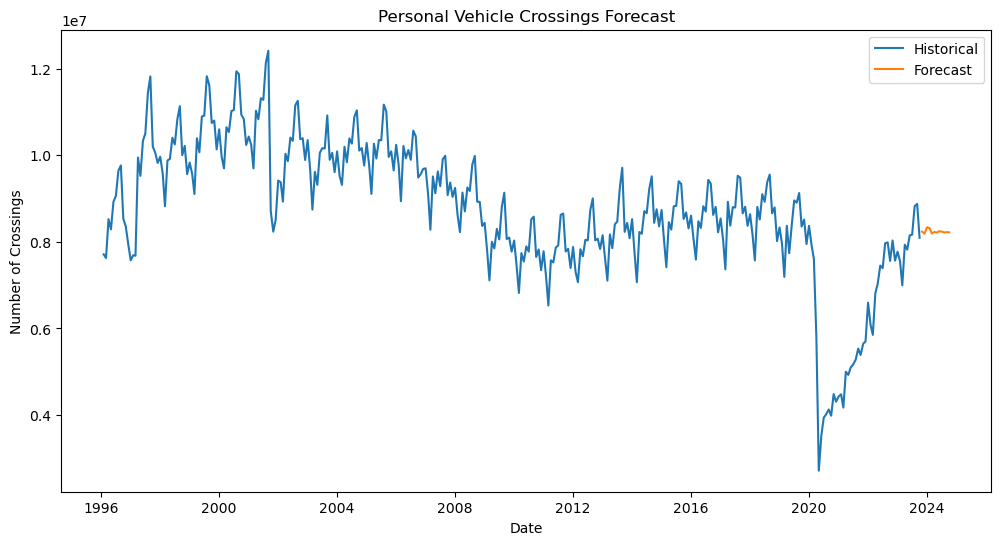

In [72]:
## ARIMA Forecast for 'Personal Vehicles'
model = ARIMA(monthly_pv['Value'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(monthly_pv['Value'], label='Historical')
plt.plot(forecast, label='Forecast')
plt.title('Personal Vehicle Crossings Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crossings')
plt.legend()
plt.show()

In [73]:
## Interactive Time Series Plot for 'Personal Vehicles'
fig = px.line(monthly_pv, x=monthly_pv.index, y='Value', title='Personal Vehicle Crossings Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Crossings')
fig.show()